## Carregando a base

In [64]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

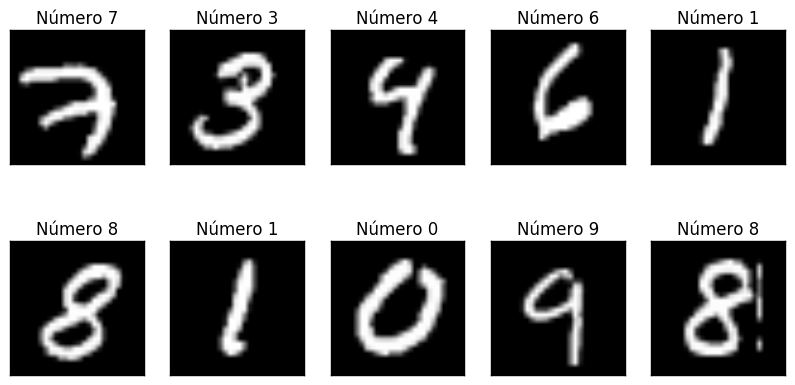

In [18]:
fig = plt.figure(figsize=(10, 5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(mnist.train.images[i].reshape((28,28))*256, cmap='gray')
    ax.set_title('Número %s' % str(mnist.train.labels[i].argmax()))

In [21]:
from neural_net import Activation, Layer, MLP

In [22]:
mnist.train.images.shape

(55000, 784)

In [29]:
learning_rate = 0.3
training_epochs = 15
batch_size = 500
list_layers = list()
list_layers.append(Layer(784, "input"))
list_layers.append(Layer(256, "hidden", "relu"))
list_layers.append(Layer(256, "hidden", "relu"))
list_layers.append(Layer(10, "output", "softmax"))
model = MLP(list_layers)

In [31]:
total_batch = int(mnist.train.num_examples/batch_size)
for i in range(20):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    model.train(batch_x, batch_y, 10, epochs=training_epochs, learnrate=learning_rate)

Train loss:  0.042232547829
Train loss:  0.0229522361081
Train loss:  0.0207056545727
Train loss:  0.0230402737509   WARNING - Loss Increasing
Train loss:  0.0228639435847
Train loss:  0.0319004680421
Train loss:  0.0194224649261
Train loss:  0.0261705384525   WARNING - Loss Increasing
Train loss:  0.0278080550354   WARNING - Loss Increasing
Train loss:  0.0294759606497   WARNING - Loss Increasing
Train loss:  0.0237760414485
Train loss:  0.0244558772773   WARNING - Loss Increasing
Train loss:  0.0249372534476   WARNING - Loss Increasing
Train loss:  0.0250550534915   WARNING - Loss Increasing
Train loss:  0.022077995707
Train loss:  0.0227830935065
Train loss:  0.0199244748146
Train loss:  0.0199429318167   WARNING - Loss Increasing
Train loss:  0.0201029217423   WARNING - Loss Increasing
Train loss:  0.0203095451128   WARNING - Loss Increasing
Train loss:  0.0265710949086
Train loss:  0.0249633682955
Train loss:  0.0235318517059
Train loss:  0.0239750453003   WARNING - Loss Increasin

KeyboardInterrupt: 

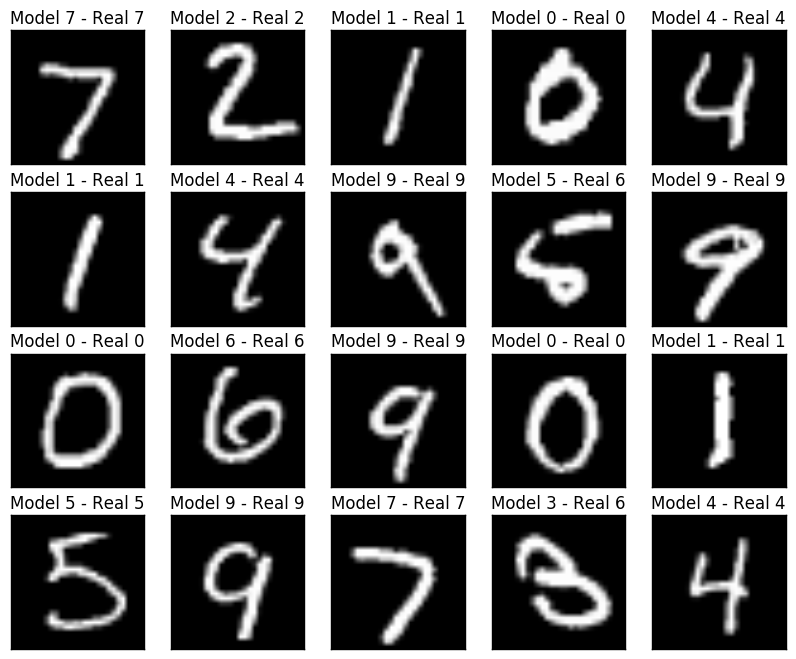

In [33]:
fig = plt.figure(figsize=(10, 8))
for i in range(20):
    ax = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    ax.imshow(mnist.test.images[i].reshape((28,28))*256, cmap='gray')
    ax.set_title('Real {} - Modelo {}'.format(mnist.test.labels[i].argmax(), model.predict(mnist.test.images[i]).argmax()))

## Utilizando o tensorflow

In [34]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf

# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


# Create model
def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model
logits = multilayer_perceptron(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,
                                                            Y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    pred = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Epoch: 0001 cost=306.909722866
Epoch: 0002 cost=99.271709602
Epoch: 0003 cost=72.706891474
Epoch: 0004 cost=58.865943807
Epoch: 0005 cost=49.903630782
Epoch: 0006 cost=43.015846982
Epoch: 0007 cost=37.778047414
Epoch: 0008 cost=33.923772238
Epoch: 0009 cost=30.988742561
Epoch: 0010 cost=28.813203117
Epoch: 0011 cost=26.899573327
Epoch: 0012 cost=25.570477404
Epoch: 0013 cost=24.360720328
Epoch: 0014 cost=22.956579064
Epoch: 0015 cost=22.032506405
Optimization Finished!
Accuracy: 0.8975


## Com Keras

In [57]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam, SGD

In [58]:
batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape) 

(60000, 28, 28) (60000,)


In [59]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [41]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [42]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.3),
              metrics=['accuracy'])

In [44]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Teste Custo:', score[0])
print('Acurácia no teste:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.3277 - acc: 0.9008 - val_loss: 0.1399 - val_acc: 0.9565
Epoch 2/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.1359 - acc: 0.9589 - val_loss: 0.0916 - val_acc: 0.9715
Epoch 3/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.0979 - acc: 0.9704 - val_loss: 0.0753 - val_acc: 0.9766
Epoch 4/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.0763 - acc: 0.9755 - val_loss: 0.0711 - val_acc: 0.9775
Epoch 5/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.0618 - acc: 0.9808 - val_loss: 0.0715 - val_acc: 0.9789
Epoch 6/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0526 - acc: 0.9836 - val_loss: 0.0708 - val_acc: 0.9764
Epoch 7/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0450 - acc: 0.9858 - val_loss: 0.0613 - 

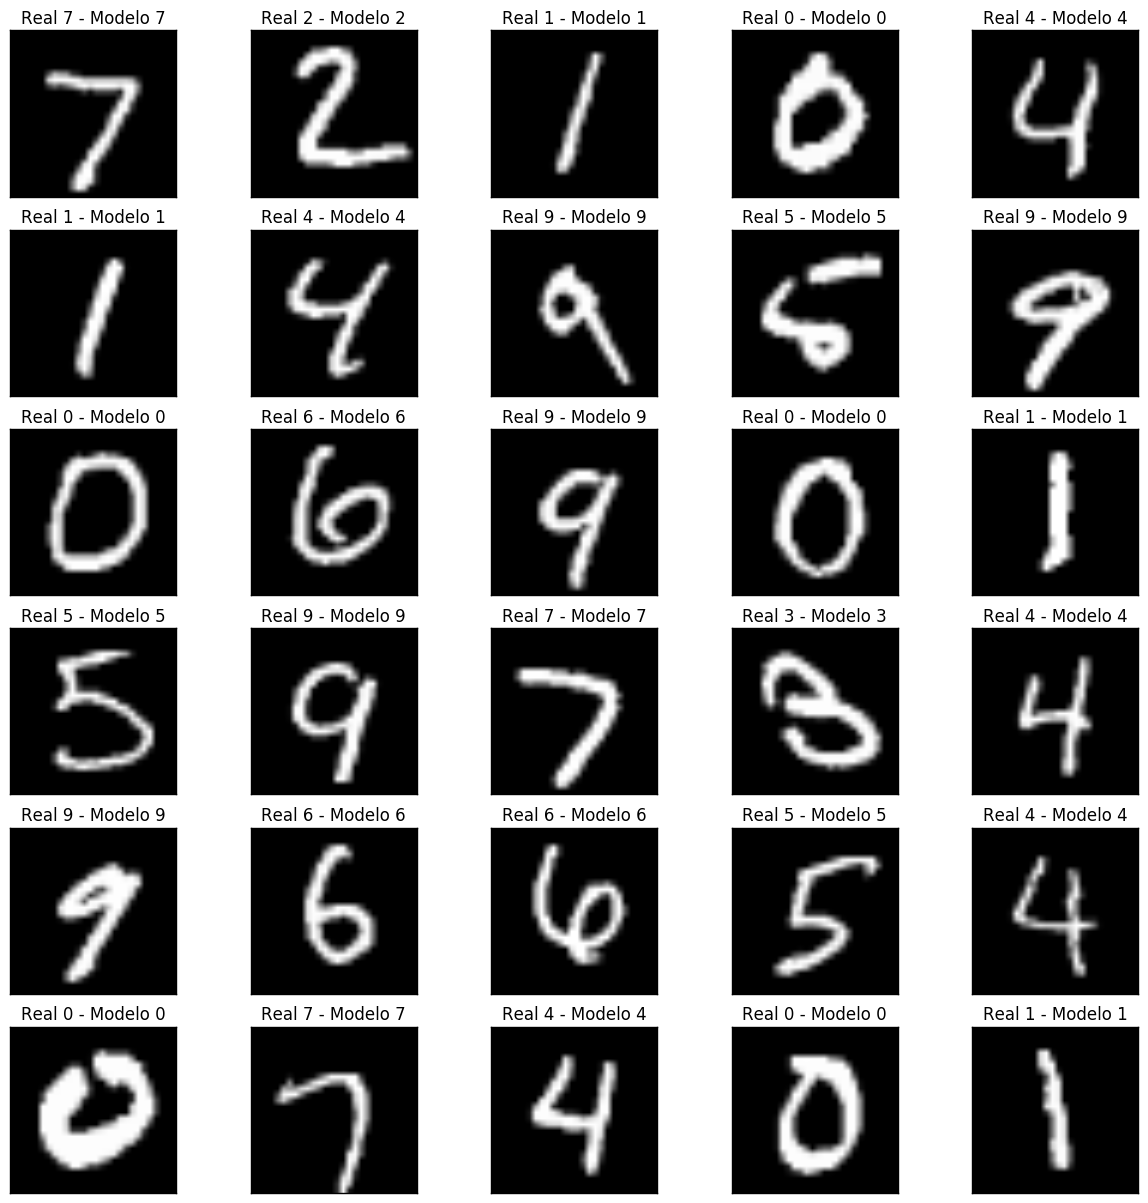

In [75]:
fig = plt.figure(figsize=(15, 15))
for i in range(30):
    ax = fig.add_subplot(6, 5, i+1, xticks=[], yticks=[])
    ax.imshow(mnist.test.images[i].reshape((28,28))*255, cmap='gray')
    ax.set_title('Real {} - Modelo {}'.format(mnist.test.labels[i].argmax(), model.predict_classes(mnist.test.images[i:i+1])[0]))

In [80]:
miss_class_x = x_test[model.predict_classes(x_test) != y_test]
miss_class_y = y_test[model.predict_classes(x_test) != y_test]

In [81]:
miss_class.shape

(158, 784)

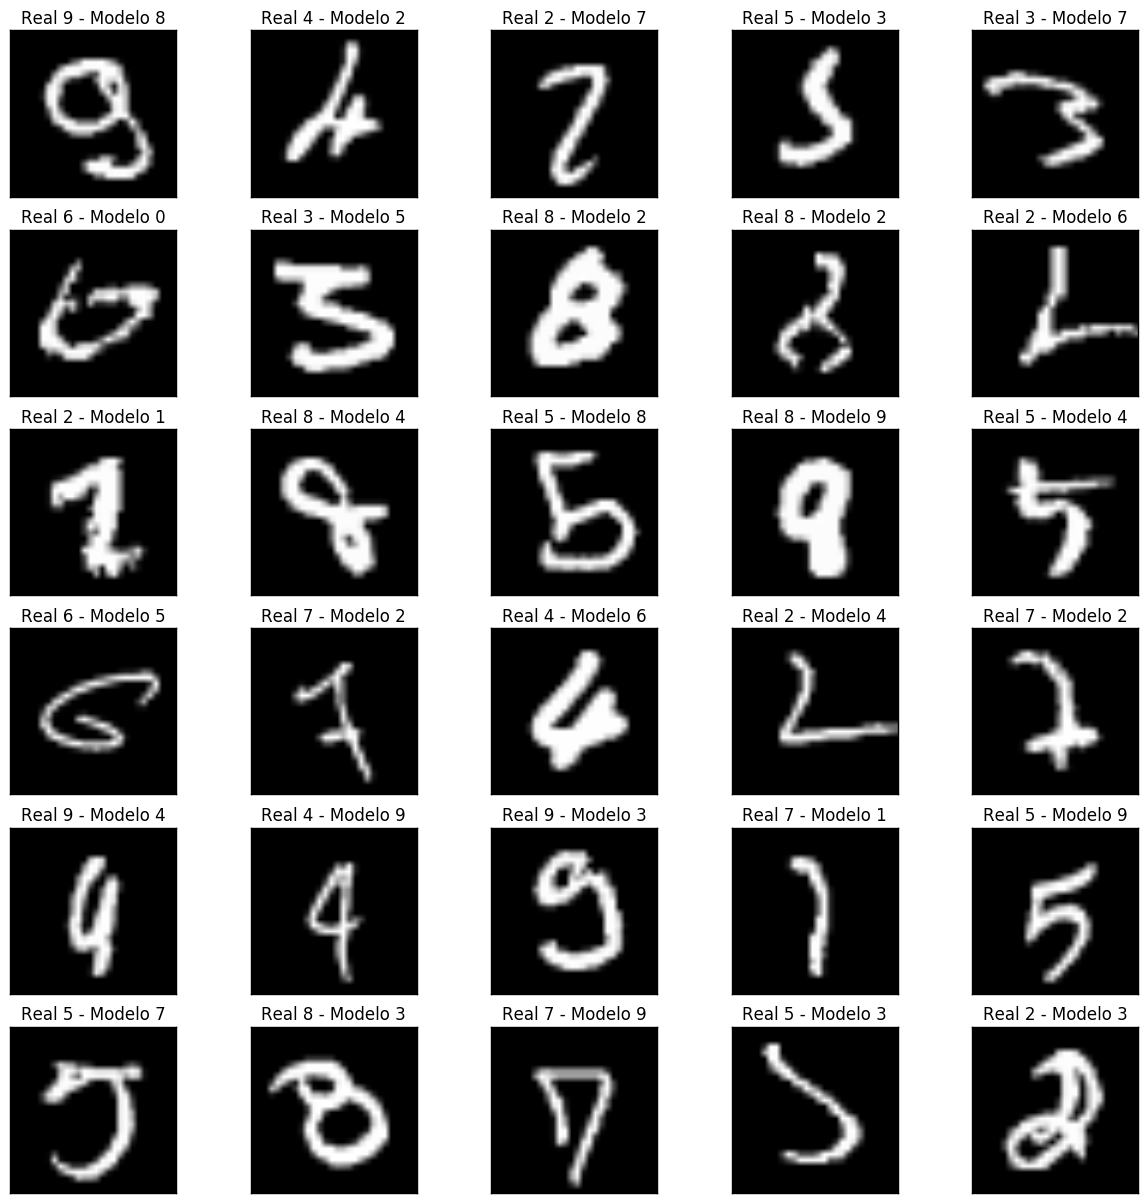

In [84]:
fig = plt.figure(figsize=(15, 15))
for i in range(30):
    ax = fig.add_subplot(6, 5, i+1, xticks=[], yticks=[])
    ax.imshow(miss_class[i].reshape((28,28))*255, cmap='gray')
    ax.set_title('Real {} - Modelo {}'.format(miss_class_y[i], model.predict_classes(miss_class_x[i:i+1])[0]))